# Modèle de régression linéaire selon la technique de la descente de gradient

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

## Je commence par créer un dataset

In [2]:
from sklearn.datasets import make_regression

In [3]:
x, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0) # On reste sur un dataset simple avec seulement 1 feature. On rajoute un peu de bruit pour que cela semble un peu plus réel.

In [4]:
print(f"x.shape : {x.shape}")
print(f"y.shape : {y.shape}")

# On remarque que les dimensions de notre matrice y ne sont pas bonnes. On corrige cela comme ça : 

y = y.reshape(y.shape[0], 1)
print(f"y.shape après modification : {x.shape}")

x.shape : (100, 1)
y.shape : (100,)
y.shape après modification : (100, 1)


Text(0, 0.5, 'target y')

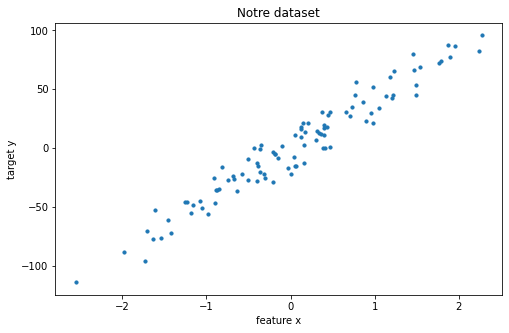

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, s=10)
plt.title('Notre dataset')
plt.xlabel('feature x')
plt.ylabel('target y')

# Le modèle

#### On souhaite créer un modèle linéaire donc de la forme y = a*x + b. On passe cette formule sous forme matricielle pour faciliter tout les calculs: F = X . theta (produit matriciel de X (matrice x à laquelle on ajoute une colonne de biais) et de theta (matrice qui contient les paramètres de notre modèle qu'il vas falloir ajuster)).

In [6]:
def model(X, theta):
    return X.dot(theta)

In [7]:
X = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
print(f"X.shape : {X.shape}, on à bien la colonne de biais qui s'est ajoutée.")

X.shape : (100, 2), on à bien la colonne de biais qui s'est ajoutée.


#### Pour 'initialiser' notre modèle, on créer un theta avec des valeurs aléatoires.

In [8]:
theta = np.random.randn(2,1)
print(f"theta.shape : {theta.shape}, on à bien une matrice à 2 valeurs, ce qui coïncide avec notre modèle à deux paramètres a et b.")

theta.shape : (2, 1), on à bien une matrice à 2 valeurs, ce qui coïncide avec notre modèle à deux paramètres a et b.


In [9]:
prediction = model(X, theta) # On prédit une valeur de y (une target) pour chacun de nos x selon notre modèle.

Text(0, 0.5, 'target y')

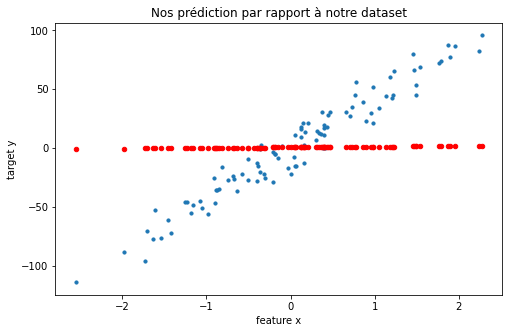

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, s=10)
plt.scatter(x, prediction, c='r', s=20)
plt.title('Nos prédiction par rapport à notre dataset')
plt.xlabel('feature x')
plt.ylabel('target y')

#### On constate que notre modèle semble très peu performant car il n'entre pas du tout dans le nuage de point de notre dataset.

# La fonction coût (mean squared error)

#### Notre fonction coût est de la forme J(theta) = 1/2m * somme( X . theta - y ) **2

#### Cette fonction représente en fait la différence entre les prédictions de notre modèle et les valeurs vraies. Si on diminu cette fonction coût, on améliore notre modèle.

In [11]:
def mean_squared_error(X, theta, y):
    m = len(X)
    return (1/(2*m)) * ((X.dot(theta) - y)**2).sum()

In [12]:
score = mean_squared_error(X, theta, y)
print(f"Le score de notre modèle est de : {score}, on est très loin de zéro !")

Le score de notre modèle est de : 956.9161150867903, on est très loin de zéro !


# Le gradient

#### Nous allons calculer le gradient de notre fonction coût. En effet, notre fonction coût étant une somme de carré, elle a une forme de parabole. Notre but est de trouver le minimum de cette parabole.

#### Notre gradient : 1/2 * X.T * ( X . theta - y )    (où X.T correspond à la transposée de la matrice X).

In [13]:
def gradient(X, theta, y):
    m = len(X)
    return (1/m) * (X.T).dot((X.dot(theta) - y))

# La descente de gradient

#### L'algorithme d'apprentissage de notre modèle va être la descente de gradient. L'idée c'est de se déplacer sur la parabole de notre fonction coût en suivant la ligne de plus grande pente jusqu'à atteindre le minimum (ou s'en rapprocher le plus possible)

#### Notre descente de gradient : theta = theta - alpha * d(J)/d(theta) 
#### Avec alpha appelé le learning rate (vitesse d'apprentissage/convergence). Si on choisi un alpha trop petit, notre programme mettra beaucoup trop de temps pour trouver le minimum. Si on le choisi trop grand, il sera impossible de trouver le minimum car on oscillera autour. Ce alpha correspond en fait à "l'écart" (la distance) entre 2 points successifs pour lesquels ont calcule le gradient de la fonction coût.

#### d(J)/d(theta) correspond au gradient de la fonction coût, c'est à dire notre gradient défini juste dans la partie précédente.

In [14]:
def descente_gradient(X, theta, y, alpha, n_iterations):
    apprentissage = np.zeros(n_iterations) # Sert à tracer la courbe d'apprentissage que l'on verra plus tard
    for i in range(n_iterations):
        theta = theta - (alpha * gradient(X, theta, y))
        
        apprentissage[i] = mean_squared_error(X, theta, y) # Sert également pour la courbe d'apprentissage. On stocke la valeur de la fonction coût à chaque itération dans notre matrice 'apprentissage'.

    return theta, apprentissage

In [15]:
theta_new, apprentissage = descente_gradient(X, theta, y, alpha=0.01, n_iterations=1000)

In [16]:
print(f"Initialement, on avait theta : {theta},\n Après la descente de gradient on a theta_new : {theta_new}.")

Initialement, on avait theta : [[0.54180833]
 [0.64739555]],
 Après la descente de gradient on a theta_new : [[42.61760033]
 [-0.81304944]].


# Les résultats du modèle

In [17]:
prediction_new = model(X, theta_new) # On refait tourner notre modèle avec notre nouvelle matrice paramètre theta_new

Text(0, 0.5, 'target y')

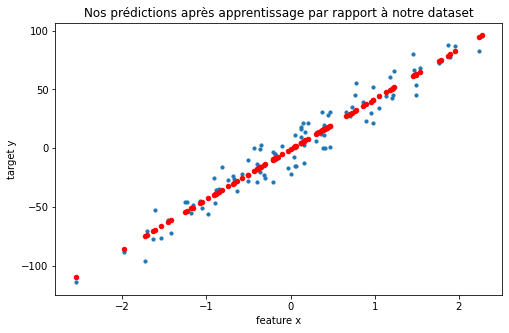

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, s=10)
plt.scatter(x, prediction_new, c='r', s=20)
plt.title('Nos prédictions après apprentissage par rapport à notre dataset')
plt.xlabel('feature x')
plt.ylabel('target y')

#### On constate que notre modèle s'ajuste beaucoup mieux à notre nuage de point et semble maintenant beaucoup plus fiable !

# La courbe d'apprentissage

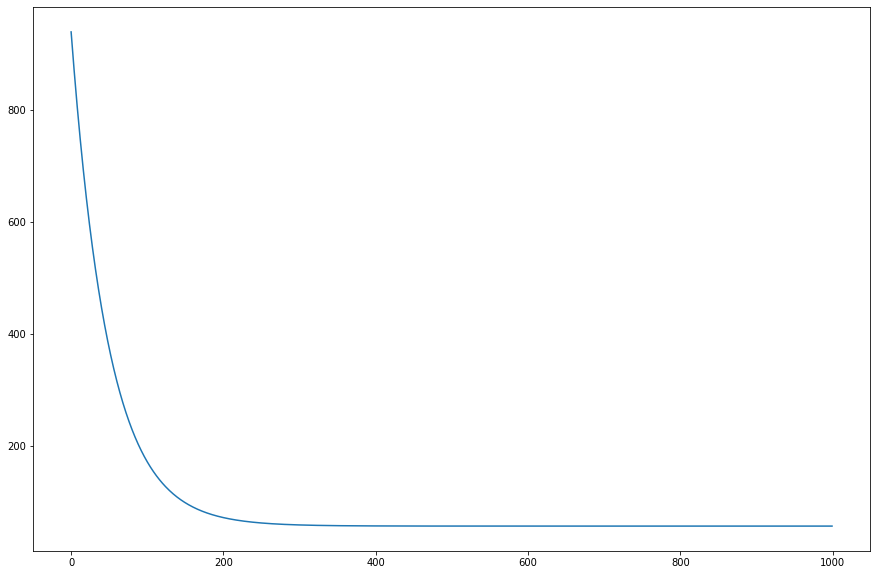

In [19]:
plt.figure(figsize=(15,10))
plt.plot(range(1000), apprentissage)

#### On constate que notre modèle à très vite "appris". En effet, après 200 itérations la fonction coût était déjà très basse et les itérations suivantes n'ont que peu servis.

# Le coefficient de détermination R^2

#### Ce coefficient permet d'évaluer les performances de notre modèle. Plus il est proche de 1, plus notre modèle 'fit' bien dans le nuage de point.

#### Sa formule est R^2 = 1 - somme((y - f(x))^2) / somme((y - y.mean())^2) c'est à dire 1 moins la somme des carrés des écarts entre prédiction et réalité sur somme au carré des écart entre réalité et moyenne des réalités.

In [23]:
def coef_determination(y, prediction):
    u = ((y - prediction)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [24]:
coef = coef_determination(y, prediction_new)

In [25]:
print(f"Le coefficient de détermination de notre modèle est de : {coef}, ce qui est plutôt satisfaisant !")

Le coefficient de détermination de notre modèle est de : 0.9417294705008733, ce qui est plutôt satisfaisant !
